# 7th World Water Foum tickets analytics

In [1]:
import pandas as pd
import numpy as np

In [3]:
tickets=pd.read_csv(r'/Users/mathias/Desktop/WWC/ParticipantsForum7th.csv',index_col=0)

In [4]:
tickets.head()

,Type,Category,Forum Pass,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
Reg. Date,,,,,,,
NaN,NaN,NaN,NaN,Country,Nationality(new),Type of Organ.,Organ.
4/2/15,On-Site,OECD Countries,1-Day Pass,"Korea, Republic of","Korea, Republic of",Government/Local government,Minstry of Foreign Affairs
3/18/15,Standard,Local,6-Day Pass,Turkey,Turkey,Government/Local government,Tekirdag Metropolitan Municipality
3/18/15,Standard,Local,6-Day Pass,Turkey,Turkey,Government/Local government,Hatay Metropolitan Municipality
3/18/15,Standard,Local,6-Day Pass,Turkey,Turkey,Government/Local government,Konya Metropolitan Municipality


In [5]:
print(len(tickets))

5902


In [6]:
tickets = tickets.iloc[1:]
tickets['Purchase date']=[int(i) for i in range(len(tickets))]
tickets.head()

,Type,Category,Forum Pass,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Purchase date
Reg. Date,,,,,,,,
4/2/15,On-Site,OECD Countries,1-Day Pass,"Korea, Republic of","Korea, Republic of",Government/Local government,Minstry of Foreign Affairs,0
3/18/15,Standard,Local,6-Day Pass,Turkey,Turkey,Government/Local government,Tekirdag Metropolitan Municipality,1
3/18/15,Standard,Local,6-Day Pass,Turkey,Turkey,Government/Local government,Hatay Metropolitan Municipality,2
3/18/15,Standard,Local,6-Day Pass,Turkey,Turkey,Government/Local government,Konya Metropolitan Municipality,3
12/30/14,Early-Bird,Forum Stakeholders,6-Day Pass,Egypt,Morocco,Others,LEAGUE OF ARAB STATES,4


In [7]:
tickets.columns = ['Ticket Type', 'Stakeholders Category','Forum Pass', 'Country','Nationality','Type of Organ.','Organ.','Purchase date']

In [8]:
tickets.index, tickets['Purchase date'] = tickets['Purchase date'],tickets.index

In [9]:
tickets.index.names = ['Ticket id']
tickets.head(20)

,Ticket Type,Stakeholders Category,Forum Pass,Country,Nationality,Type of Organ.,Organ.,Purchase date
Ticket id,,,,,,,,
0,On-Site,OECD Countries,1-Day Pass,"Korea, Republic of","Korea, Republic of",Government/Local government,Minstry of Foreign Affairs,4/2/15
1,Standard,Local,6-Day Pass,Turkey,Turkey,Government/Local government,Tekirdag Metropolitan Municipality,3/18/15
2,Standard,Local,6-Day Pass,Turkey,Turkey,Government/Local government,Hatay Metropolitan Municipality,3/18/15
3,Standard,Local,6-Day Pass,Turkey,Turkey,Government/Local government,Konya Metropolitan Municipality,3/18/15
4,Early-Bird,Forum Stakeholders,6-Day Pass,Egypt,Morocco,Others,LEAGUE OF ARAB STATES,12/30/14
5,Early-Bird,Other Countries,6-Day Pass,United Arab Emirates,United Arab Emirates,Government/Local government,Federal Electricity & water Authotity,12/4/14
6,Standard,Student,1-Day Pass,"Korea, Republic of","Korea, Republic of","Academia, Research Institute",kyungpook national university,3/9/15
7,Standard,HoD,6-Day Pass,Senegal,Senegal,International Organization,AMCOW,3/10/15
8,Standard,Parliament,6-Day Pass,Mexico,Mexico,Government/Local government,Chamber of Senators,3/16/15


In [10]:
tickets = tickets[
                  ['Ticket Type', 
                   'Stakeholders Category', 
                   'Forum Pass', 
                   'Country',
                   'Type of Organ.',
                   'Purchase date']
                 ]
tickets.head()

,Ticket Type,Stakeholders Category,Forum Pass,Country,Type of Organ.,Purchase date
Ticket id,,,,,,
0,On-Site,OECD Countries,1-Day Pass,"Korea, Republic of",Government/Local government,4/2/15
1,Standard,Local,6-Day Pass,Turkey,Government/Local government,3/18/15
2,Standard,Local,6-Day Pass,Turkey,Government/Local government,3/18/15
3,Standard,Local,6-Day Pass,Turkey,Government/Local government,3/18/15
4,Early-Bird,Forum Stakeholders,6-Day Pass,Egypt,Others,12/30/14


In [11]:
country_tab= tickets['Country'].unique()

In [12]:
print(country_tab)

['Korea, Republic of' 'Turkey' 'Egypt' 'United Arab Emirates' 'Senegal'
 'Mexico' 'Uganda' 'United States' 'Netherlands'
 'Iran, Islamic Republic of' 'Morocco' 'Kenya' 'Palestine, State of'
 'Tunisia' 'Niger' 'Bahrain' 'Ghana' 'Kuwait' 'Sierra Leone' 'UAE' 'Qatar'
 'Maldives' 'Saudi Arabia' 'Kyrgyzstan' 'Cuba'
 'Venezuela, Bolivarian Republic of' 'Pakistan' 'Philippines' 'Ethiopia'
 'Nigeria' 'Cote d`Ivoire' 'Burkina Faso' 'Thailand' 'Indonesia' 'Mali'
 'France' 'Azerbaijan' 'Togo' 'Brazil' 'Spain' 'United Kingdom' 'Benin'
 'Malaysia' 'Afghanistan' 'Oman' 'Yemen' 'Sudan' 'Japan' 'Nepal'
 'Singapore' 'Ireland' 'Kazakhstan' 'China' 'India' 'Belgium' 'Seychelles'
 'Uruguay' 'Angola' 'Colombia' 'Germany' 'Canada' 'Chinese Taipei'
 'Israel' 'Iran' 'Jordan' 'South Africa' 'Lao Peoples Democratic Republic'
 'Tanzania' 'Chile' 'Russian Federation' 'Samoa' 'Lebanon'
 'Tanzania, United Republic of' 'Hungary' 'Costa Rica' 'Sweden'
 'Switzerland' 'Bangladesh' 'Namibia' 'Armenia' 'Sri Lanka' 'Alger

In [13]:
for country in tickets['Country']:
    if country == 'Korea, Republic of' or country == 'Korea' or country == 'South Korea':
        country = 'Korea, South'
    elif country == 'Iran, Islamis Republic of':
        country = 'Iran'
    elif country == 'Palestine, State of':
        country = 'Palestine'
    elif country == 'UAE':
        country = 'United Arab Emirats'
    elif country == 'Venezuela, Bolivarian Republic of':
        country = 'Venezuela'
    elif country == 'Chinese Taipei':
        country = 'China'
    elif country == 'Lao People Democratic Republic':
        country = 'Laos'
    elif country == 'Tanzania, United Republic of':
        country = 'Tanzania'
    elif country == 'French Polynesia':
        country = 'France'
    elif country == 'United of Kingdom':
        country = 'United Kingdom'
    elif country == 'Congo, the Democratic Republic of the':
        country = 'Congo, Democratic Republic of'
    elif country == 'Cap-Vert':
        country = 'Cape Verde'
    elif country == 'Syrian Arab Republic':
        country = 'Syria'
    elif country == 'Czech Republic':
        country = 'CZ'
    elif country == 'The Gambia':
        country = 'Gambia'
    elif country == 'USA':
        country = 'US'
    elif country == 'ALGERIA':
        country = 'Algeria'
    elif country == 'GERMANY':
        country = 'Germany'
    elif country == 'AUSTRALIA':
        country = 'Australia'
    elif country == 'Timor-Leste':
        country = 'East Timor'
    
    


In [14]:
Other_index=[]
for i in range(len(tickets)):
    position = tickets.iloc[i,4]
    if type(position) == str:
        if 'Others' in position:
            Other_index.append(i)
        elif '\'' in position :
            Other_index.append(i)
print(Other_index[:5])
print(len(Other_index))

[4, 50, 55, 75, 88]
245


In [15]:
tickets_bis = tickets.drop(Other_index)
print(len(tickets_bis))
print(len(tickets))

5656
5901


In [16]:
country_continent = pd.read_csv(r'/Users/mathias/Downloads/Country_to_continent.csv')

In [17]:
country_continent.loc[195]={'Continent': 'Asia', 'Country':'Palestine'}
print(country_continent)

         Continent    Country
0           Africa    Algeria
1           Africa     Angola
2           Africa      Benin
3           Africa   Botswana
4           Africa    Burkina
..             ...        ...
190  South America       Peru
191  South America   Suriname
192  South America    Uruguay
193  South America  Venezuela
195           Asia  Palestine

[195 rows x 2 columns]


In [18]:
tableau = pd.merge(tickets_bis, country_continent, left_on='Country', right_on='Country')

In [19]:
print(len(tableau))
tableau.head()

2644


,Ticket Type,Stakeholders Category,Forum Pass,Country,Type of Organ.,Purchase date,Continent
0,Standard,Local,6-Day Pass,Turkey,Government/Local government,3/18/15,Asia
1,Standard,Local,6-Day Pass,Turkey,Government/Local government,3/18/15,Asia
2,Standard,Local,6-Day Pass,Turkey,Government/Local government,3/18/15,Asia
3,Standard,20% DC,6-Day Pass,Turkey,Government/Local government,3/17/15,Asia
4,Standard,Local,6-Day Pass,Turkey,Government/Local government,3/18/15,Asia


## Numérisation

In [20]:
tableau['Purchase date']= pd.to_datetime(tableau['Purchase date'])

tableau= tableau.dropna()

tableau.head()

,Ticket Type,Stakeholders Category,Forum Pass,Country,Type of Organ.,Purchase date,Continent
0,Standard,Local,6-Day Pass,Turkey,Government/Local government,2015-03-18,Asia
1,Standard,Local,6-Day Pass,Turkey,Government/Local government,2015-03-18,Asia
2,Standard,Local,6-Day Pass,Turkey,Government/Local government,2015-03-18,Asia
3,Standard,20% DC,6-Day Pass,Turkey,Government/Local government,2015-03-17,Asia
4,Standard,Local,6-Day Pass,Turkey,Government/Local government,2015-03-18,Asia


In [21]:
tickets=tickets_bis
tickets.head()

,Ticket Type,Stakeholders Category,Forum Pass,Country,Type of Organ.,Purchase date
Ticket id,,,,,,
0,On-Site,OECD Countries,1-Day Pass,"Korea, Republic of",Government/Local government,4/2/15
1,Standard,Local,6-Day Pass,Turkey,Government/Local government,3/18/15
2,Standard,Local,6-Day Pass,Turkey,Government/Local government,3/18/15
3,Standard,Local,6-Day Pass,Turkey,Government/Local government,3/18/15
5,Early-Bird,Other Countries,6-Day Pass,United Arab Emirates,Government/Local government,12/4/14


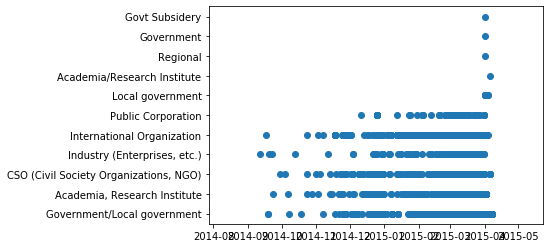

In [22]:
import matplotlib.pyplot as plt
plt.scatter(tableau['Purchase date'],tableau['Type of Organ.'],)
plt.show()


In [23]:

dico_TypeOfOrgan = {'Govt Subsidery':0,
                    'Government':1,
                    'Regional':2,
                    'Academia/Research Institute':3,
                    'Local government':4,
                    'Public Corporation':5,
                    'International Organization':5,
                    'Industry (Enterprises, etc.)':6,
                    'CSO (Civil Society Organizations, NGO)':7,
                    'Academia, Research Institute':8,
                    'Government/Local government':9                   
                   }

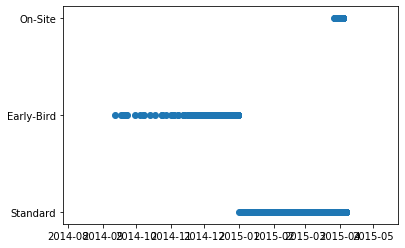

In [24]:
import matplotlib.pyplot as plt
plt.scatter(tableau['Purchase date'],tableau['Ticket Type'],)
plt.show()

In [25]:
dico_TicketType = { 'On-Site':0,
                  'Early-Bird':1,
                  'Standard':2
                  }

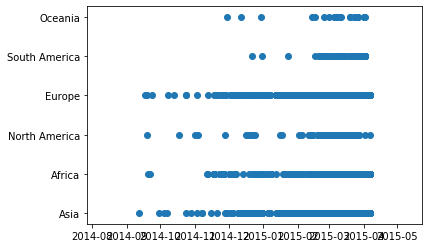

In [26]:
import matplotlib.pyplot as plt
plt.scatter(tableau['Purchase date'],tableau['Continent'],)
plt.show()

dico_continent = {'Oceania':0,
                  'North America':1,
                  'Europe':2,
                  'Africa':3,
                  'South America':4,
                  'Asia':5
                 }

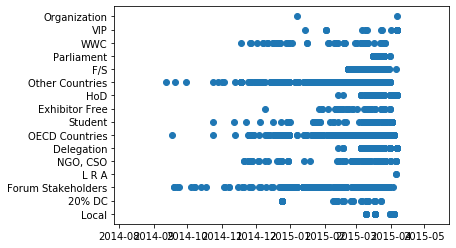

In [27]:
import matplotlib.pyplot as plt
plt.scatter(tableau['Purchase date'],tableau['Stakeholders Category'],)
plt.show()

In [28]:
dico_stakeholders = {'Organization':0,
                     'VIP':1,
                     'WWC':2,
                     'Parliament':3,
                     'F/S':4,
                     'Other Countries':5,
                     'HoD':6,
                     'Exhibitor Free':7,
                     'Student':8,
                     'OECD Countries':9,
                     'Delegation':10,
                     'NGO, CSO':11,
                     'L R A':12,
                     'Forum Stakeholders':13,
                     '20% DC':14,
                     'Local':15
                    }

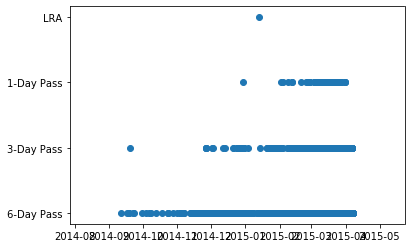

In [29]:
import matplotlib.pyplot as plt
plt.scatter(tableau['Purchase date'],tableau['Forum Pass'],)
plt.show()

In [30]:
dico_ForumPass={'LRA':0,
                   '1-Day Pass':1,
                   '3-Day Pass':2,
                   '6-Day Pass':3 
                  }

In [31]:
# Définit une fonction générique en utilisant la fonction replace de Pandas
def coding(col, codeDict):
    colCoded = pd.Series(col, copy=True)
    for key, value in codeDict.items():
        colCoded.replace(key, value, inplace=True)
    return colCoded
tableau.head()

,Ticket Type,Stakeholders Category,Forum Pass,Country,Type of Organ.,Purchase date,Continent
0,Standard,Local,6-Day Pass,Turkey,Government/Local government,2015-03-18,Asia
1,Standard,Local,6-Day Pass,Turkey,Government/Local government,2015-03-18,Asia
2,Standard,Local,6-Day Pass,Turkey,Government/Local government,2015-03-18,Asia
3,Standard,20% DC,6-Day Pass,Turkey,Government/Local government,2015-03-17,Asia
4,Standard,Local,6-Day Pass,Turkey,Government/Local government,2015-03-18,Asia


In [32]:
# Transformation pour les institutions :

print('Avant codage:')
print(pd.value_counts(tableau["Type of Organ."]))
tableau["Type of Organ."] = coding(tableau["Type of Organ."], dico_TypeOfOrgan)
print('\nAprès codage:')
print(pd.value_counts(tableau["Type of Organ."]))

Avant codage:
Government/Local government               921
CSO (Civil Society Organizations, NGO)    445
International Organization                421
Academia, Research Institute              365
Industry (Enterprises, etc.)              219
Public Corporation                         92
Local government                            7
Academia/Research Institute                 1
Regional                                    1
Govt Subsidery                              1
Government                                  1
Name: Type of Organ., dtype: int64

Après codage:
9    921
5    513
7    445
8    365
6    219
4      7
3      1
1      1
2      1
0      1
Name: Type of Organ., dtype: int64


In [33]:
# Transformation pour les Ticket Type :

print('Avant codage:')
print(pd.value_counts(tableau['Ticket Type']))
tableau["Ticket Type"] = coding(tableau["Ticket Type"], dico_TicketType)
print('\nAprès codage:')
print(pd.value_counts(tableau["Ticket Type"]))

Avant codage:
Standard      2061
Early-Bird     272
On-Site        141
Name: Ticket Type, dtype: int64

Après codage:
2    2061
1     272
0     141
Name: Ticket Type, dtype: int64


In [34]:
# Transformation pour les continents :

print('Continent')
print(pd.value_counts(tableau['Continent']))
tableau['Continent'] = coding(tableau['Continent'], dico_continent)
print('\nAprès codage:')
print(pd.value_counts(tableau['Continent']))

Continent
Asia             937
Europe           635
Africa           632
North America    139
South America    100
Oceania           31
Name: Continent, dtype: int64

Après codage:
5    937
2    635
3    632
1    139
4    100
0     31
Name: Continent, dtype: int64


In [35]:
# Transformation pour les Stakeholders Category :

print('Stakeholders Category')
print(pd.value_counts(tableau['Stakeholders Category']))
tableau['Stakeholders Category'] = coding(tableau['Stakeholders Category'], dico_stakeholders)
print('\nAprès codage:')
print(pd.value_counts(tableau['Stakeholders Category']))

Stakeholders Category
Other Countries       794
OECD Countries        407
Forum Stakeholders    230
Delegation            227
F/S                   193
Student               136
NGO, CSO              118
Local                  75
HoD                    68
20% DC                 61
WWC                    55
Exhibitor Free         52
Parliament             34
VIP                    20
Organization            2
L R A                   2
Name: Stakeholders Category, dtype: int64

Après codage:
5     794
9     407
13    230
10    227
4     193
8     136
11    118
15     75
6      68
14     61
2      55
7      52
3      34
1      20
12      2
0       2
Name: Stakeholders Category, dtype: int64


In [36]:
# Transformation pour les Forum Pass:

print('Forum Pass')
print(pd.value_counts(tableau['Forum Pass']))
tableau['Forum Pass'] = coding(tableau['Forum Pass'], dico_ForumPass)
print('\nAprès codage:')
print(pd.value_counts(tableau['Forum Pass']))

Forum Pass
6-Day Pass    1940
3-Day Pass     440
1-Day Pass      93
LRA              1
Name: Forum Pass, dtype: int64

Après codage:
3    1940
2     440
1      93
0       1
Name: Forum Pass, dtype: int64


In [37]:
tableau.head()

,Ticket Type,Stakeholders Category,Forum Pass,Country,Type of Organ.,Purchase date,Continent
0,2,15,3,Turkey,9,2015-03-18,5
1,2,15,3,Turkey,9,2015-03-18,5
2,2,15,3,Turkey,9,2015-03-18,5
3,2,14,3,Turkey,9,2015-03-17,5
4,2,15,3,Turkey,9,2015-03-18,5


In [38]:
import time
from datetime import datetime
for i in range(len(tableau)):
    date = tableau.iloc[i,5]
    tableau.iloc[i,5] = int(round(date.timestamp() * 1000))

In [39]:
tableau.head(-5)

,Ticket Type,Stakeholders Category,Forum Pass,Country,Type of Organ.,Purchase date,Continent
0,2,15,3,Turkey,9,1426636800000,5
1,2,15,3,Turkey,9,1426636800000,5
2,2,15,3,Turkey,9,1426636800000,5
3,2,14,3,Turkey,9,1426550400000,5
4,2,15,3,Turkey,9,1426636800000,5
...,...,...,...,...,...,...,...
2634,2,4,3,Solomon Islands,9,1425600000000,0
2635,2,4,3,Cape Verde,7,1424995200000,3
2636,2,5,3,Guinea,7,1422576000000,3
2637,2,4,3,Grenada,9,1427328000000,1


# Machine learning 

Utilisation d'un random forest pour predire à partir du continent, de la position et du type d'institution le jour d'achat du ticket pour le forum.

In [40]:
#Basic imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
# Creation des labels et des features
X = tableau[['Ticket Type','Stakeholders Category', 'Forum Pass', 'Type of Organ.','Continent']]
y= tableau['Purchase date']
#Set seed for reproducibility
SEED  = 1

#Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=SEED)

In [41]:
# Instantiate a ramdon forests regressor 'rf' 400 estimators

rf = RandomForestRegressor(n_estimators=400, random_state=SEED)



In [42]:
# Fit 'rf' to the training set
rf.fit(X_train, y_train)

# Predict the test set labels 'ypred'
y_pred=rf.predict(X_test)


In [43]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE (milliseconds) of rf: {:.2f}'.format(rmse_test))

Test set RMSE (milliseconds) of rf: 1467272961.68


# Erreur sur le jour

In [44]:
erreur_jour = rmse_test/1000/60/60/24

print('Erreur Quadratique moyenne sur le jour (en jour) : \n')
print(int(erreur_jour))

Erreur Quadratique moyenne sur le jour (en jour) : 

16


# Importance des caractéristiques

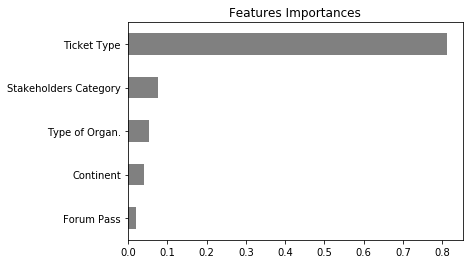

In [45]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='grey')
plt.title('Features Importances')
plt.show()